# Instagram Fake Profile Detection

This project aims to detect fake profiles on Instagram using various machine learning classifiers. The workflow includes data exploration, preprocessing, model training, and evaluation. The final model combines multiple classifiers using a Voting Classifier for improved performance.

---

In [64]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

# Load the train and test datasets
train_df = pd.read_csv('fake_train.csv')
test_df = pd.read_csv('fake_test.csv')



In [65]:
train_df.head(100)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.00,2,0.0,0,73,0,1,232,1312,935,0
96,1,0.00,1,0.0,0,24,0,0,20,699,599,0
97,1,0.00,0,0.0,0,0,0,0,98,4328,418,0
98,1,0.00,0,0.0,0,26,1,0,559,2487,999,0


In [66]:
import warnings

warnings.filterwarnings("ignore")


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    fxn()

DATA EXPLORATION

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [68]:
test_df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [69]:
train_df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [70]:
train_df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [71]:
train_df['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [72]:
train_df['profile pic'].value_counts()


profile pic
1    404
0    172
Name: count, dtype: int64

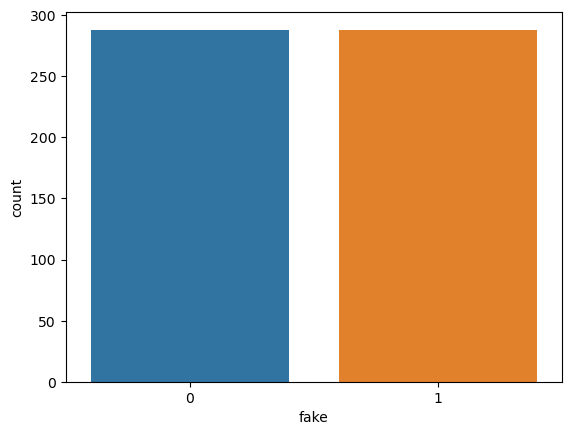

In [73]:
sns.countplot(x='fake', data=train_df)
plt.show()

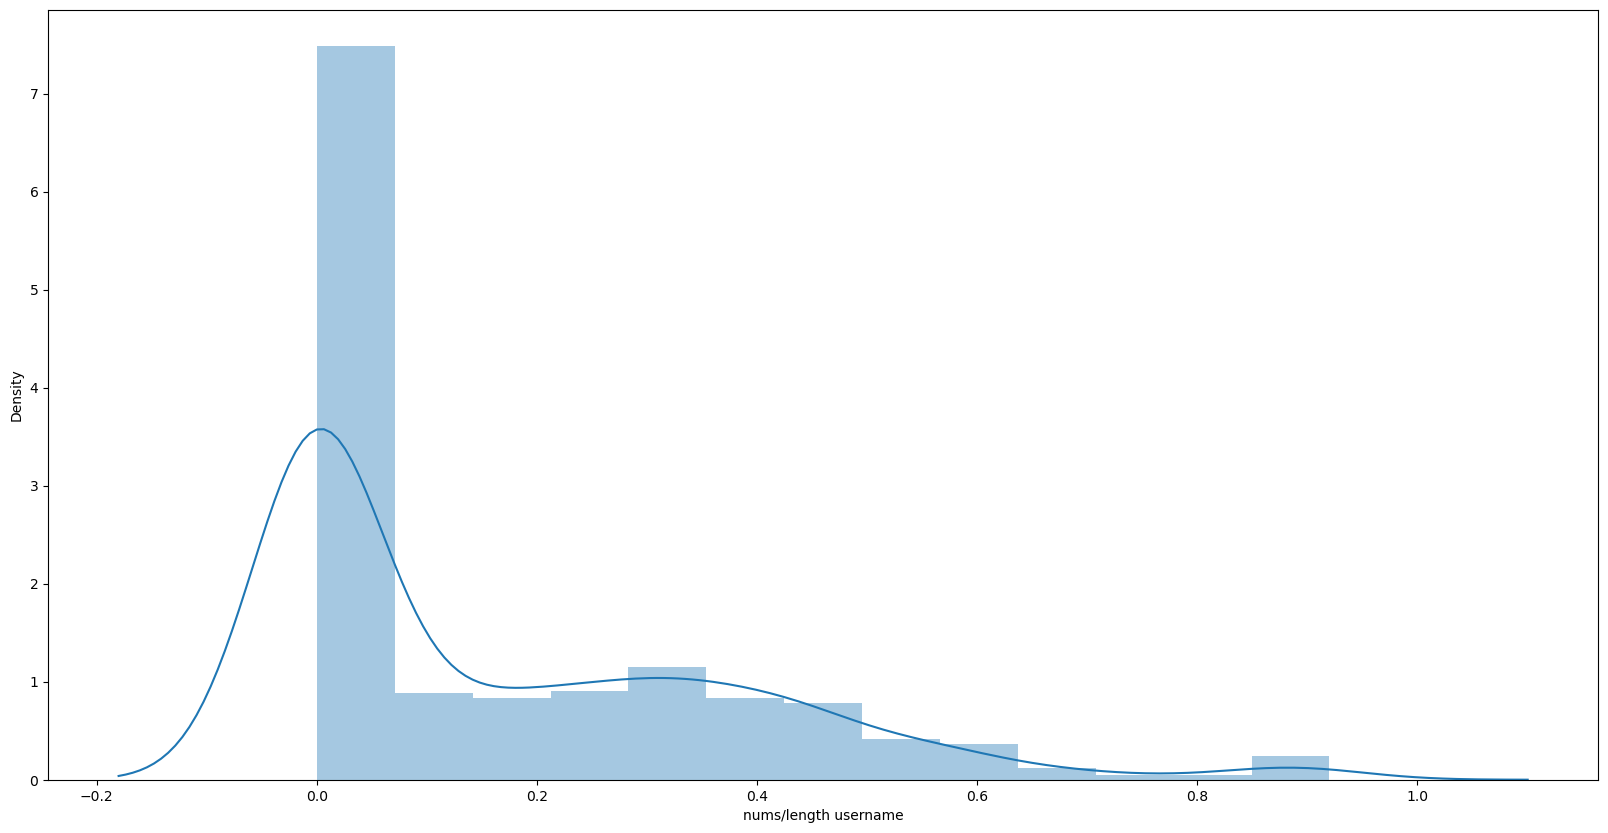

In [74]:
plt.figure(figsize = (20, 10))
sns.distplot(train_df['nums/length username'])
plt.show()

## Step 3: Data Preprocessing

We need to preprocess the data before training the models. This includes separating features and labels and normalizing the features.


In [75]:
from sklearn.preprocessing import StandardScaler

# Define the target column
target_column = 'fake'

# Separating features and labels
X_train = train_df.drop(target_column, axis=1)
y_train = train_df[target_column]
X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]

# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Step 4: Model Building and Evaluation

We will train and evaluate several classifiers:
1. Logistic Regression
2. K-Nearest Neighbors
3. Decision Tree
4. Random Forest
5. Support Vector Machine (SVM)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'{model_name} Results:')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(conf_matrix)
    print('\n' + '-'*60 + '\n')

# Train and evaluate each classifier
for model_name, model in classifiers.items():
    train_and_evaluate_model(model, model_name)


Logistic Regression Results:
Accuracy: 0.8750
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.88      0.87      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120

Confusion Matrix:
[[53  7]
 [ 8 52]]

------------------------------------------------------------

K-Nearest Neighbors Results:
Accuracy: 0.8833
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        60
           1       0.88      0.88      0.88        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120

Confusion Matrix:
[[53  7]
 [ 7 53]]

------------------------------------------------------------

Decision

## Step 5: Voting Classifier

We will combine the classifiers using a Voting Classifier and evaluate its performance.


In [78]:
from sklearn.ensemble import VotingClassifier

# Define the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', classifiers['Logistic Regression']), 
        ('knn', classifiers['K-Nearest Neighbors']), 
        ('dt', classifiers['Decision Tree']),
        ('rf', classifiers['Random Forest']),
        ('svm', classifiers['SVM'])
    ],
    voting='hard'  # Change to 'soft' for soft voting
)

# Train and evaluate the Voting Classifier
train_and_evaluate_model(voting_clf, 'Voting Classifier')


Voting Classifier Results:
Accuracy: 0.8750
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        60
           1       0.87      0.88      0.88        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120

Confusion Matrix:
[[52  8]
 [ 7 53]]

------------------------------------------------------------

